Idea for outline of paper, following Adams et al. 2017 Frontal Circulation and Submesoscale Variability during the Formation of a Southern
Ocean Mesoscale Eddy
Leading from Julia's work, what can we learn about the smaller scale processes along the edge of the filaments that were not captured by the drifters. Particularly, are they susceptible to submesoscale instabilities, which presumably would lead to downscale energy cascade to dissipation.
Comparison between filament and upwelling fronts: difficult due to lack of scanfish data at upwelling fronts, but perhaps possible in more qualitative sense. Or with glider or Catamaran data. The paper is essentially laid out like Adams et al. 2017.

Notes from Adams et al. 2017
- ACC in geostr balance; large scale instabilities cause mesoscale meanders and eddies
- subduction of CO2 and heat
- how do smaller scale process influence subduction of heat and CO2?
- submeso instrumental in extracting energy from density fronts, transferring from meso to submeso to dissipative scales (Thomas Taylor 2010; Capet et al 2008)
- downscale transfer = ageostrophic motions with large vertical velocities
-   > transport of heat and tracers
- ?? "the presence of fronts preconditions the mixed layer to the development of submesoscale procesesses" ??
- submeso associtate with hydrodynamic instabilities: baro mix layer (MLI), symmetric (SI), inertial (II), and gravitational (GI)
-      > first three grow at expense of APE associated with lateral density gradients (MLI) or thermal wind kinetic energy (II,SI); ie likely to develop at fronts and modify mixed layer density structure
       > GI is convectively driven; generated by unstable vertical stratification
       > "Mixing associated with GI leads to deeper mixed layers, while MLI and SI results in restratification"
- "an energetic submesoscale is expected in a region with high mesoscale kinetic energy (EKE)
   > high Ro meanders are indicative of a highly energetic mesoscale field
- processing: interp method for seasoar; error velocities from ADCP processing used as estimates of uncertainty
- found difluent flow in most sections, confluent flow in one region
- contributions of cyclogeostrophic varies too

General notes
- what is geostrophic balance along the filament?
- along front, is flow confluent or difluent? Does it vary in different cs or sides of filament?
- compare centripetal accel to Coriolis to estimate Ageostrophic component
- Compare Ro from Meso (gos) and submeso (ADCP data)
- what was wind like, how does this affect results
- what about biogeochem data? 

In [3]:
#from mpl_toolkits.basemap import Basemap
import numpy as np
import scipy as sp
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline  
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
import urllib.request
import xarray as xr
import pandas as pd
import glob
import os
from datetime import datetime
from collections import OrderedDict
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from oceans.datasets import etopo_subset
from oceans.sw_extras import gamma_GP_from_SP_pt
from matplotlib.patches import Polygon
import gsw
from matplotlib import animation, rc
from IPython.display import HTML
import scipy.io
#import pixiedust # for pixie_debugger
import pycwt as wavelet
from pyspec import helmholtz as helm
from pyspec import spectrum as spec    

os.chdir("/Users/North/Drive/Work/UniH_Work/DataAnalysis/jlab_files") # need to set working directory to get the next step to work
from Benguela.src.met132_ctd_ladcp_functions import load_combine_ladcp_ctd_data #import load_ctd_data
from Benguela.src.met132_scanfish_sadcp_functions import load_combine_sadcp_scanfish_data #import load_ctd_data
import Benguela.src.met132_plotting_functions as fg
import Benguela.src.met132_sea_level_functions as sl
import Denmark_Strait.src.spectra_and_wavelet_functions as sw
import Denmark_Strait.src.ssa_core as ssa

# some colors (prettier than default boring colors)
color2 = '#6495ed'
color1 = '#ff6347'
color5 = '#8470ff'
color3 = '#3cb371'
color4 = '#ffd700'
color6 = '#ba55d3'

Load the data

In [6]:
# ====== load bathymetry
filenames = "/Users/North/Documents/temp_offline_backups/mmap/etopo1/etopo1_namibia_coast.nc"
topo = xr.open_dataset(filenames)
# ====== load SST map
filenames = "/Volumes/Backup/finished_work/Meteor_MET132_ADCP_Processing/ADCPprocessing/rawdata/MET_132/Analysis/maps_images/A2016323.L3m_DAY_SST_sst_4km.nc"
sst_map_18 = xr.open_dataset(filenames) # lat,lon,sst
filenames = "/Volumes/Backup/finished_work/Meteor_MET132_ADCP_Processing/ADCPprocessing/rawdata/MET_132/Analysis/maps_images/A2016324.L3m_DAY_SST_sst_4km.nc"
sst_map_19 = xr.open_dataset(filenames) # lat,lon,sst
filenames = "/Volumes/Backup/finished_work/Meteor_MET132_ADCP_Processing/ADCPprocessing/rawdata/MET_132/Analysis/maps_images/A2016327.L3m_DAY_SST_sst_4km.nc"
sst_map_22 = xr.open_dataset(filenames) # lat,lon,sst
filenames = "/Volumes/Backup/finished_work/Meteor_MET132_ADCP_Processing/ADCPprocessing/rawdata/MET_132/Analysis/maps_images/A2016328.L3m_DAY_SST_sst_4km.nc"
sst_map_23 = xr.open_dataset(filenames) # lat,lon,sst
# ====== load SSH map
#filenames = "/Volumes/Backup/finished_work/Meteor_MET132_ADCP_Processing/ADCPprocessing/rawdata/MET_132/Analysis/maps_images/nrt_global_allsat_msla_h_20161128_20161128.nc"
#ssh_map = xr.open_dataset(filenames) # lat,lon,sst
#sl.import_gos_sla_adt_data(year='2015',month='04',days=['20','21'])
gos_filenames = '/Users/North/Drive/Work/UniH_Work/DataAnalysis/Data/MET_132/Remote_Sensing/*.nc'
gos_map = sl.load_gos_data(gos_filenames)
#gos_map.adt.sel(time='2015-04-20',lon=slice(292,312.2),lat=slice(-58.5,-51.5)).plot()
 
## plot settings
#font = {'family' : 'normal','weight' : 'normal','size'   : 16}
#matplotlib.rc('font', **font)

In [7]:
# ====== load glider track
# Load in file and call it mat
filenames = "/Users/North/Drive/Work/UniH_Work/DataAnalysis/Data/MET_132/Gliders/sebastian_gps_data.mat"
mat = scipy.io.loadmat(filenames) # check what variables are there (in the dictionary): #mat.keys()
date_t = [datetime.utcfromtimestamp(i) for i in mat['t'][0,:]] # Convert time axis to date form:
glider_track = xr.DataArray(np.append(mat['lon'],mat['lat'],axis=0),coords=[('lon_lat',['lon','lat']), ('time', date_t)])
# ====== load SADCP and Scanfish data
pathScanData = r'/Users/North/Drive/Work/UniH_Work/DataAnalysis/Data/MET_132/Scanfish/'   
#fileSADCPdata = r'/Users/North/Drive/Work/UniH_Work/DataAnalysis/Data/MET_132/SADCP/met_132_os75nb.nc'
fileSADCPdata = r'/Users/North/Drive/Work/UniH_Work/DataAnalysis/Data/MET_132/SADCP/met_132_os75nb_100sEnsemble.nc'
scan_sadcp, scanfish, sadcp_transects, sadcp = load_combine_sadcp_scanfish_data(fileSADCPdata,pathScanData,grid_dx=750,grid_dz=5)
# ====== load CTD and LADCP data
pathCTDdata = r'/Users/North/Drive/Work/UniH_Work/DataAnalysis/Data/MET_132/CTD_calibrated/Down_Casts/1db_mean/data/'                     # use your path
pathLADCPdata = r'/Users/North/Drive/Work/UniH_Work/DataAnalysis/Data/MET_132/LADCP/profiles/'                     # use your path
ctd_ladcp, ctd, ladcp = load_combine_ladcp_ctd_data(pathLADCPdata, pathCTDdata)


/Users/North/anaconda/envs/work3/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/North/anaconda/envs/work3/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/North/anaconda/envs/work3/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/North/anaconda/envs/work3/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/North/anaconda/envs/work3/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/North/anaconda/envs/work3/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a

a. Mesoscale: Overview of region, upwelling and filament feature observed during cruise

/Users/North/anaconda/envs/work3/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*args2)


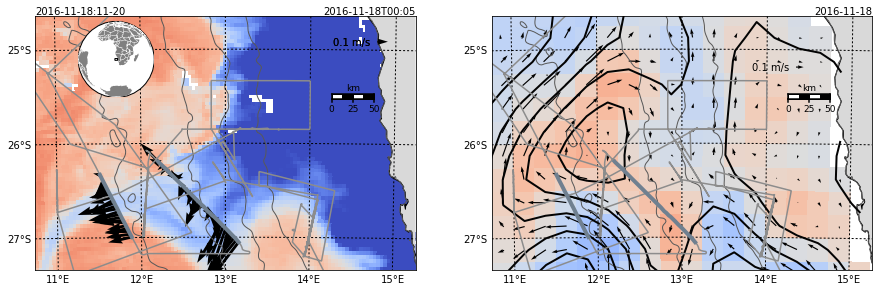

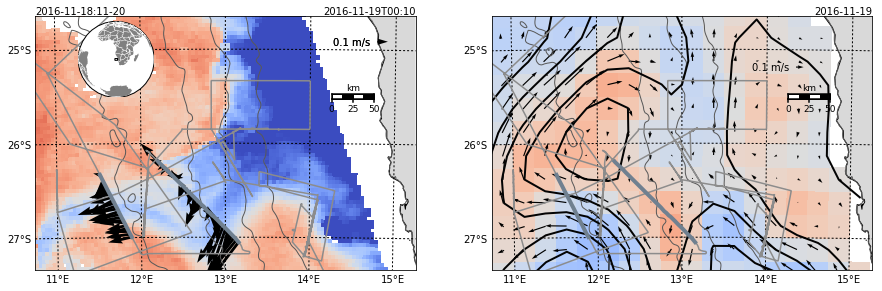

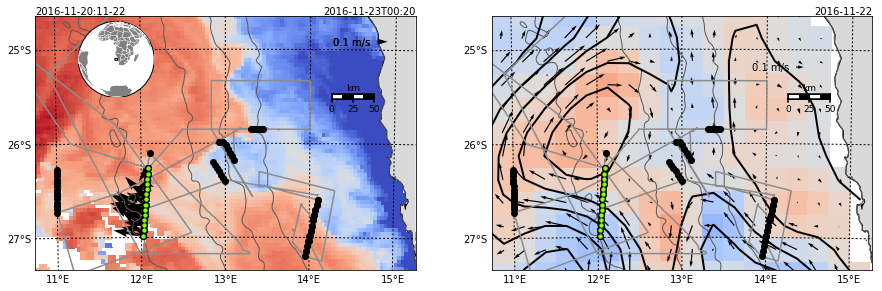

In [8]:
trans_ind = slice(0,2)
fg.plot_map_view(sadcp=sadcp, scan_sadcp = scan_sadcp[trans_ind],topo=topo,
                 sst_map=sst_map_18,sst_map1=gos_map.sel(time='2016-11-18',lon=slice(10,16),lat=slice(-28,-24)),ssh_name='adt',
                 x_lim=[0,150])
fg.plot_map_view(sadcp=sadcp, scan_sadcp = scan_sadcp[trans_ind],topo=topo,
                 sst_map=sst_map_19,sst_map1=gos_map.sel(time='2016-11-19',lon=slice(10,16),lat=slice(-28,-24)),ssh_name='adt',
                 x_lim=[0,150])
fg.plot_map_view(sadcp=sadcp, ctd_data = ctd, ctd_ladcp = ctd_ladcp[trans_ind],topo=topo,
                 sst_map=sst_map_23,sst_map1=gos_map.sel(time='2016-11-22',lon=slice(10,16),lat=slice(-28,-24)),ssh_name='adt',
                 x_lim=[0,150])
#fg.plot_map_view(sadcp, ctd, glider_track, ladcp, scanfish, scan_sadcp[trans_ind], ctd_ladcp[trans_ind],
#                              topo,sst_map,gos_map.sel(time='2016-11-18',lon=slice(10,16),lat=slice(-28,-24)),ssh_name='adt',x_lim=[0,150])

Figure caption: Ship track overlaying, left panels SST image, right panels Ro as color, SSH as contours, and currents derived from SSA as vectors. 
ADCP/Scanfish transects are shown in thick grey lines, with surface currents. CTD/LADCP stations are black or green circles.
Each row is a different day, corresponding to Row 1) first (furthest east) ADCP/Scanfish transect, Row 2) second ADCP/Scanfish transect, Row3) first of repeated LADCP/CTD transect

b. Cross-frontal variability; description of filament fronts

/Users/North/anaconda/envs/work3/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


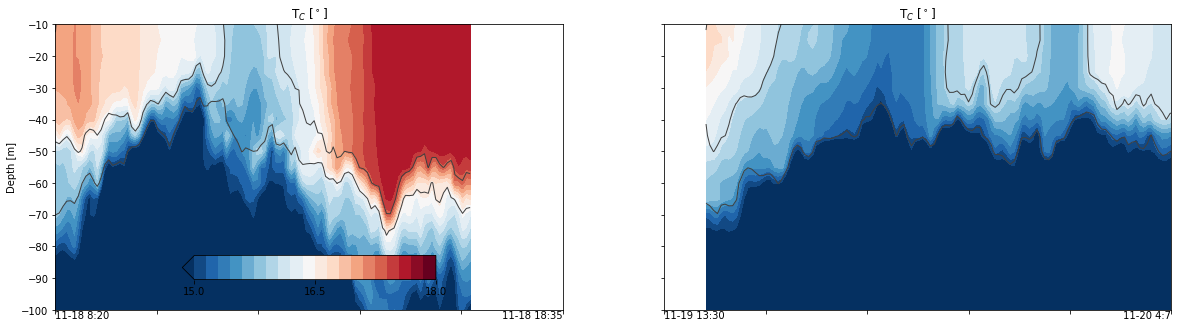

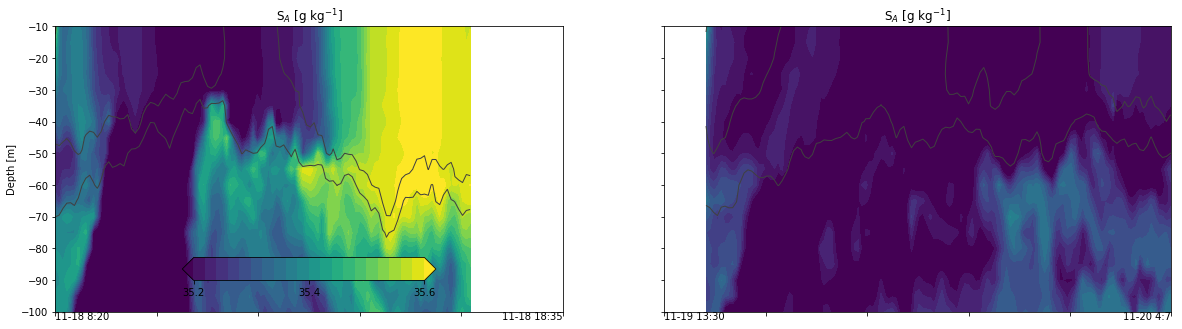

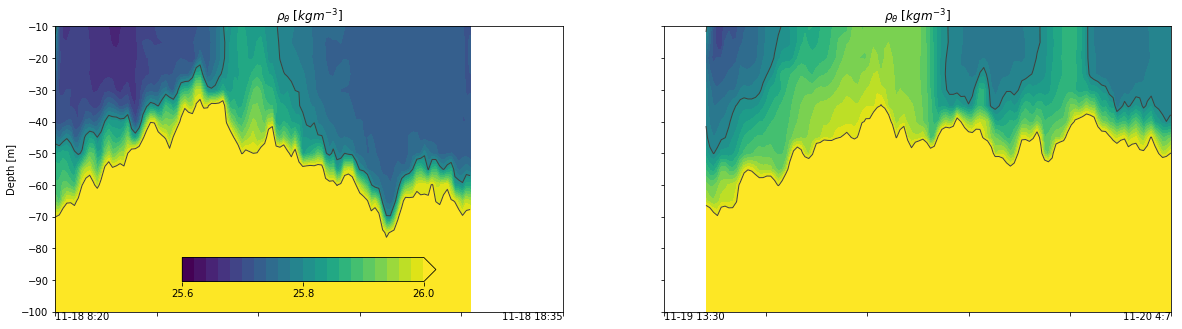

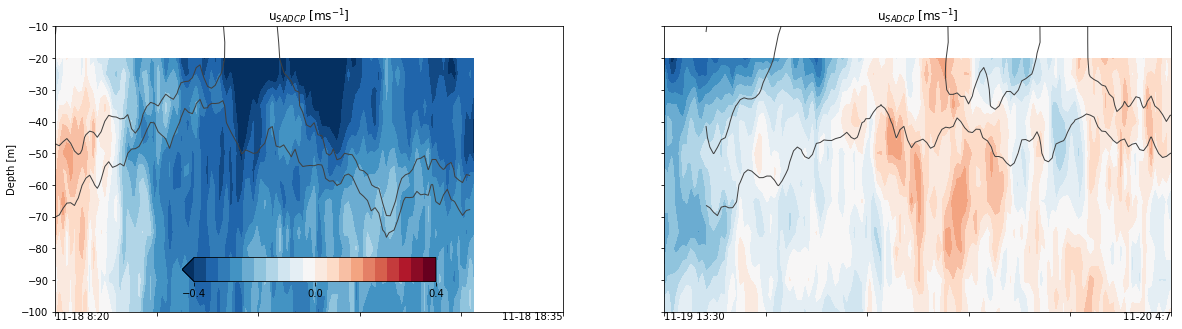

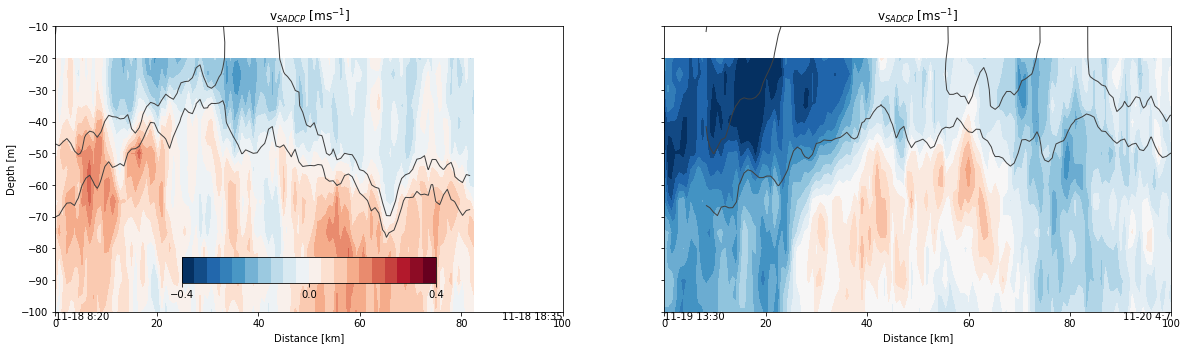

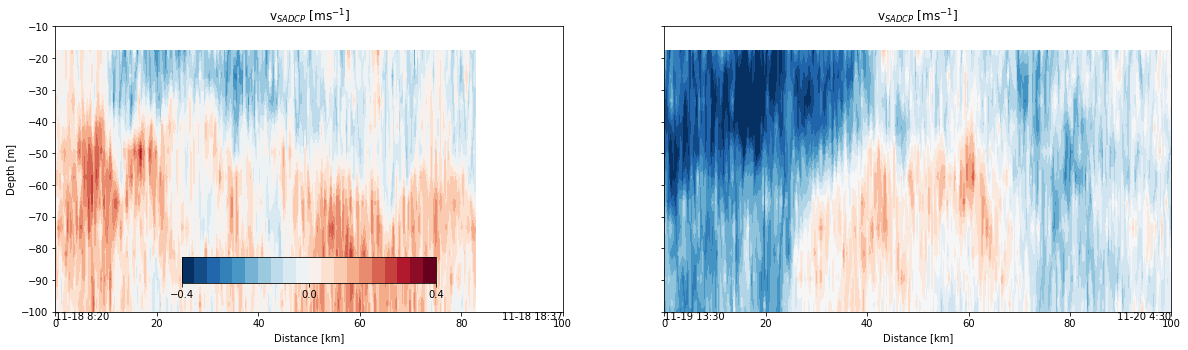

In [9]:
# each call to plot_profile_view makes a row of plots for the variable "var_names"
# The dates in the lower left hand corners indicate the start of the section
# All colorbars are consistent for all instruments
trans_ind = slice(0,2) 
x_lim = [0,100]
y_lim = [-100,-10]
var_names = list(('CT',''))
fg.plot_profile_view(scan_sadcp[trans_ind], None, var_names, x_lim=x_lim, y_lim=y_lim)
var_names = list(('SA',''))
fg.plot_profile_view(scan_sadcp[trans_ind], None, var_names, x_lim=x_lim, y_lim=y_lim)
var_names = list(('sigma_0',''))
fg.plot_profile_view(scan_sadcp[trans_ind], None, var_names, x_lim=x_lim, y_lim=y_lim)
var_names = list(('u',''))
fg.plot_profile_view(scan_sadcp[trans_ind], None, var_names, x_lim=x_lim, y_lim=y_lim)
var_names = list(('v',''))
fg.plot_profile_view(scan_sadcp[trans_ind], None, var_names, x_lim=x_lim, y_lim=y_lim, last_row_flag=1)
# check higher res ADCP data
var_names = list(('v',''))
fg.plot_profile_view(sadcp_transects[trans_ind], None, var_names, x_lim=x_lim, y_lim=y_lim, last_row_flag=1)

# filament not cut off from deeper water; is there upwelling along isopycnals?
# compare geostrophic velocities with measured to get ageostrophic component
# how does currents vary across filament, where are maxima; use LADCP repeate transects to see how this changes in time, effect of storm

In [ ]:
ADD some simpler line plots that highlight average cross-front variability (e.g. Adams et al Fig 3a)


c. Frontal circulation from drifter data

In [5]:
### NEED DATA

d. Estimate vertical velocity

In [6]:
### NEED CALC

e. Submesoscale instabilities
Compare to microstructure

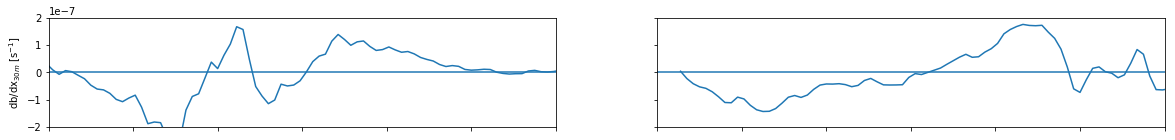

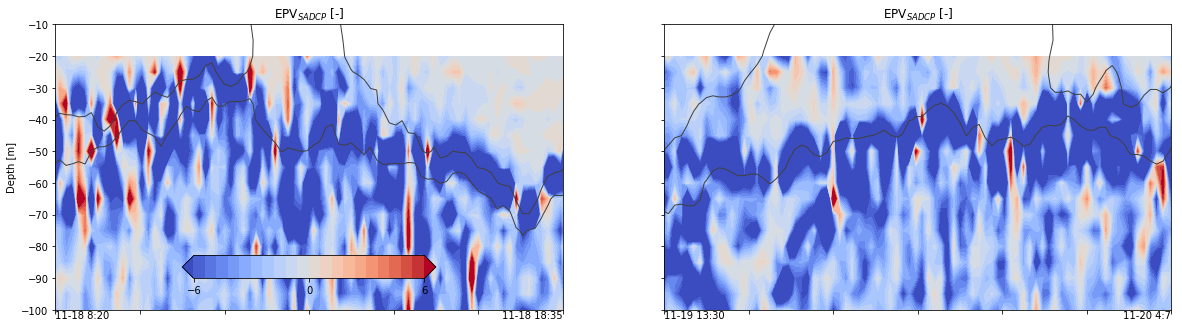

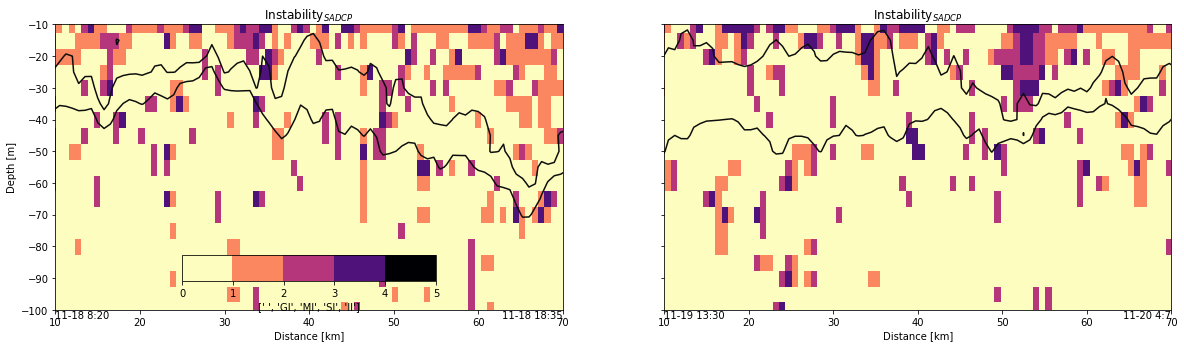

In [10]:
trans_ind = slice(0,2)
x_lim = [10,70]
# add db/dz at 20 m water depth to indicate front location
fg.plot_line_at_one_depth(scan_sadcp[trans_ind], 'db_dx', depth_in=-30, window=10, x_lim=x_lim)

# plotting Ertel Potential Vorticity 
# Where EPV > 0, instabilities may form; the type of Instability can be determined using Rib
# thin contour lines show density, trying to locate the filament approximately
y_lim = [-100,-10]
var_names = list(('EPV_plot',''))
fg.plot_profile_view(scan_sadcp[trans_ind], None, var_names, x_lim=x_lim,y_lim=y_lim)
# ==!!== Gravitational, Mixed (Grav and Sym), Symmetric, and eventually Inertial and Stable, but the last two are not yet setup
# thicker black contour lines show the estimated bottom of the mixed layer, following Adams et al. 2017, this is where the density
# has changed by 0.01 or 0.001 starting from the surface (i.e. shallowest available value)
var_names = list(('Instability_GravMixSymInertStab',''))
fg.plot_profile_view(scan_sadcp[trans_ind], None, var_names, x_lim=x_lim,y_lim=y_lim,last_row_flag=1,pcolormesh_flag=1)

# results show that, excluding noise, instabilities tend to form in surface mixed layer. There is variability within filament, 
# with regions of +ve EPV and instabilities, and regions of -ve PV without instabilities
# Gravitational instabilities (orange) are found outside the filament, and mixed or Symmetric (purple) inside.

f. Water mass modification

In [8]:
### T-S diagrams to investigate cross-front exchange
# mixing and advection of water masses; by comparing earlier and later transects
# may be best to use three transects of CTD data

g. Horizontal kinetic energy spectra

In [11]:
# calculate Kinetic Energy 
sadcp_transects[0]['ke'] = 0.5*((sadcp_transects[0].u)**2+(sadcp_transects[0].v)**2) # m**2/s**2
sadcp_transects[1]['ke'] = 0.5*((sadcp_transects[1].u)**2+(sadcp_transects[1].v)**2) # m**2/s**2

## is this the velocity variance? as in Rocha et al. 2016?
#! what does "spec_est2" do in https://github.com/cesar-rocha/dp_spectra/blob/master/synthetic/aux_func.py ?
#    ! seems to be what Rocha describes on p 603
#    ! following https://github.com/cesar-rocha/dp_spectra/blob/master/synthetic/stochastic_spectra.ipynb 
#    ! also see use of spec.Spectrum in https://github.com/pyspec/pyspec/blob/master/examples/example_1d_spec.ipynb 
#! spec.Spectrum is basically what I did, but more in depth; use as simple, but double check results
    #! results are similar, without Welch windowing, ie D=N
# now with across, along and using spec.Spectra
# why is divergent component so small - read papers on interpreting these plots
sadcp_transects[0]['u_ke'] = 0.5*((sadcp_transects[0].u)**2) # m**2/s**2
sadcp_transects[1]['u_ke'] = 0.5*((sadcp_transects[1].u)**2) # m**2/s**2
sadcp_transects[0]['v_ke'] = 0.5*((sadcp_transects[0].v)**2) # m**2/s**2
sadcp_transects[1]['v_ke'] = 0.5*((sadcp_transects[1].v)**2) # m**2/s**2

# rotate to get along-across track velocities
sadcp_transects[0] = sw.rotate_vel2across_along(sadcp_transects[0])
sadcp_transects[1] = sw.rotate_vel2across_along(sadcp_transects[1])
sadcp_transects[0]['ac_ke'] = 0.5*((sadcp_transects[0].across)**2) # m**2/s**2
sadcp_transects[1]['ac_ke'] = 0.5*((sadcp_transects[1].across)**2) # m**2/s**2
sadcp_transects[0]['al_ke'] = 0.5*((sadcp_transects[0].along)**2) # m**2/s**2
sadcp_transects[1]['al_ke'] = 0.5*((sadcp_transects[1].along)**2) # m**2/s**2


U,V Power spectra and decomposition using Bühler et al. 2014, from Rocha et al. 

/Users/North/anaconda/envs/work3/lib/python3.6/site-packages/scipy/signal/spectral.py:1773: UserWarning: nperseg = 371 is greater than input length  = 277, using nperseg = 277
  .format(nperseg, input_length))
/Users/North/anaconda/envs/work3/lib/python3.6/site-packages/scipy/signal/spectral.py:1773: UserWarning: nperseg = 541 is greater than input length  = 461, using nperseg = 461
  .format(nperseg, input_length))


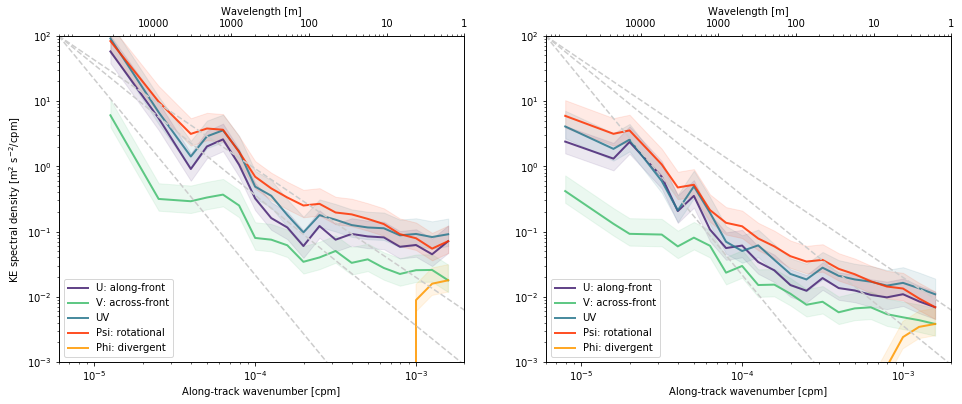

In [12]:
depth_range = slice(0,-100)
nbins_spec_av=10

#K_KE, psd_KE, nspec_KE = pspecd_depth_av(sadcp_transects[0], spec_variable='ke', depth_range_in=depth_range,nbins_spec_av=10)

fig = plt.figure(facecolor='w', figsize=(16.,6.))
for ti in range(2):
    K_u, psd_u, nspec_u = sw.pspecd_depth_av(sadcp_transects[ti], spec_variable='ac_ke', depth_range_in=depth_range,nbins_spec_av=nbins_spec_av)
    K_v, psd_v, nspec_v = sw.pspecd_depth_av(sadcp_transects[ti], spec_variable='al_ke', depth_range_in=depth_range,nbins_spec_av=nbins_spec_av)
    K_uv, psd_uv, nspec_uv = sw.pspecd_depth_av(sadcp_transects[ti], spec_variable='ke', depth_range_in=depth_range,nbins_spec_av=nbins_spec_av)

    psi_rot, phi_div = helm.spec_helm_decomp(K_u,psd_u/2, psd_v/2)

    ax = list((1,1))
    ax[ti] = fig.add_subplot(1,2,ti+1)
    
    uEl,uEu = spec.spec_error(psd_u/2, sn=nspec_u, ci=0.95) 
    vEl,vEu = spec.spec_error(psd_v/2, sn=nspec_v, ci=0.95) 
    uvEl,uvEu = spec.spec_error(psd_uv/2, sn=nspec_uv, ci=0.95) 
    rotEl,rotEu = spec.spec_error(psi_rot, sn=nspec_u, ci=0.95) 
    divEl,divEu = spec.spec_error(phi_div, sn=nspec_u, ci=0.95) 

    ax[ti].fill_between((K_u),uEl,uEu, color=plt.cm.viridis(0.1), alpha=0.1)
    ax[ti].loglog((K_u),psd_u/2, alpha=0.85,color=plt.cm.viridis(0.1),lw=2,label=('U: along-front'))
    ax[ti].fill_between((K_v),vEl,vEu, color=plt.cm.viridis(0.7), alpha=0.1)
    ax[ti].loglog((K_v),psd_v/2, alpha=0.85,color=plt.cm.viridis(0.7),lw=2,label=('V: across-front'))
    ax[ti].fill_between((K_uv),uvEl,uvEu, color=plt.cm.viridis(0.4), alpha=0.1)
    ax[ti].loglog((K_uv),psd_uv/2, alpha=0.85,color=plt.cm.viridis(0.4),lw=2,label=('UV'))

    ax[ti].fill_between((K_v),rotEl,rotEu, color=plt.cm.autumn(0.2), alpha=0.1)
    ax[ti].loglog((K_v),psi_rot, alpha=0.85,color=plt.cm.autumn(0.2),lw=2,label=('Psi: rotational'))
    ax[ti].fill_between((K_v),divEl,divEu, color=plt.cm.autumn(0.6), alpha=0.1)
    ax[ti].loglog((K_v),phi_div, alpha=0.85,color=plt.cm.autumn(0.6),lw=2,label=('Phi: divergent'))

    xlim, ylim = [6*10**-6,2*10**-3], [10**-3, 10**2]
    sw.plot_loglog_slope(ax[ti],np.array((-5/3,-2,-3)),xlim,ylim)
    ax[ti].set_ylim(ylim)
    ax[ti].set_xlim(xlim)
    lg = ax[ti].legend(loc=3)
    ax[ti].set_xlabel("Along-track wavenumber [cpm]")
    if ti==0: ax[ti].set_ylabel(r"KE spectral density [m$^2$ s$^{-2}$/cpm]")
        
    sw.add_second_axis(ax[ti])
    ax[ti].set_xlabel("Along-track wavenumber [cpm]")


Figure caption: Kinetic energy spectra of the first (left panel) and second (right panel) ADCP/Scanfish transects. Each line is average spectra over top 100 m. Shading is 95% uncertainty level.
Shown are the U-component (purple) of KE, V-component (light green) of KE, full KE (blue), and rotational (red) and divergent (orange) components. 
The latter is based on Bühler et al. 2014, from code of Rocha et al. 2016. Why is divergent so small?
Dashed lines show -3, -2, -5/3 slopes.

KE spectra using different methods and Welch windowing

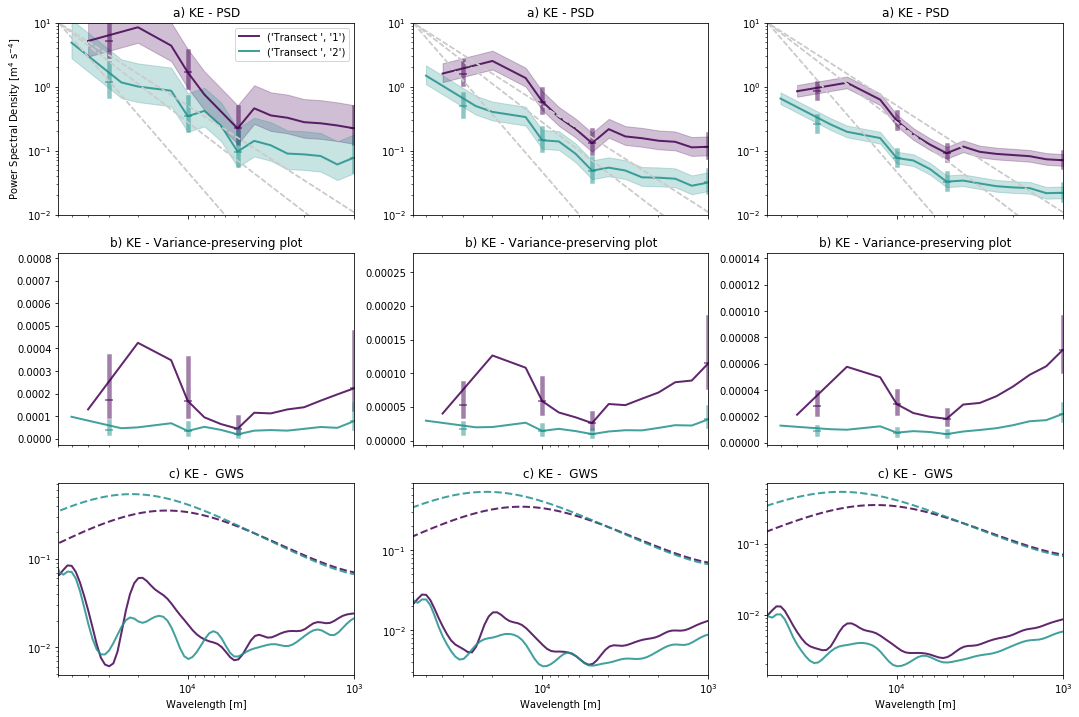

In [13]:
fg.fftwaveplt_KE(sadcp_transects,depth_range_in=np.array((slice(0,-50),slice(0,-200),slice(0,-500))),ylim=[10**-2, 10**1],xlim=[10**3, 6*10**4],
              nbins_spec_av=10,wavelet_scale_av=[10**3,10**4],psd_only=None)